In [1]:
%config Completer.use_jedi = False

# Create data

In [2]:
import numpy as np

In [3]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

# Split data

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [6]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [7]:
train_input.shape, test_input.shape

((42, 1), (14, 1))

# Build a k-nearest neighbor model

In [8]:
from sklearn.neighbors import KNeighborsRegressor

In [9]:
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
knr.score(test_input, test_target)

0.992809406101064

In [10]:
knr.predict([[50]])

array([1010.])

# Visualize result

In [11]:
import matplotlib.pyplot as plt

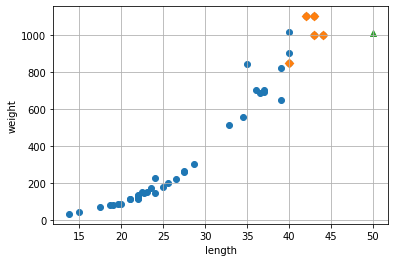

In [12]:
distances, indexs = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexs], train_target[indexs], marker='D')
plt.scatter(50, 1010, marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.grid()
plt.show()

In [13]:
np.mean(train_target[indexs])

1010.0

In [14]:
knr.predict([[100]])

array([1010.])

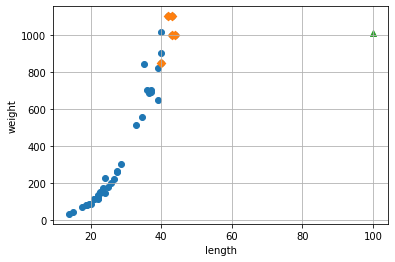

In [15]:
distances, indexs = knr.kneighbors([[100]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexs], train_target[indexs], marker='D')
plt.scatter(100, 1010, marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.grid()
plt.show()

# Linear regressor

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr = LinearRegression()
lr.fit(train_input, train_target)
lr.score(test_input, test_target)

0.8247503123313558

In [18]:
lr.predict([[50]])

array([1241.83860323])

In [19]:
lr.coef_, lr.intercept_

(array([39.01714496]), -709.0186449535477)

# Visualize data

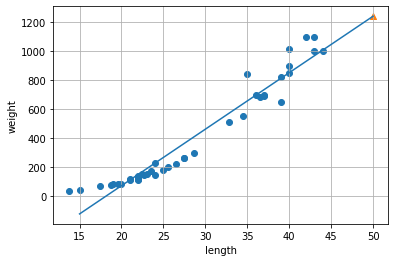

In [20]:
plt.scatter(train_input, train_target)
plt.plot([15, 50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])

plt.scatter(50, 1241.83860323, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.grid()
plt.show()

In [21]:
lr.score(train_input, train_target)

0.939846333997604

In [22]:
lr.score(test_input, test_target)

0.8247503123313558

# Polynomial regression

In [23]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

train_poly.shape, test_poly.shape

((42, 2), (14, 2))

In [24]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
lr.predict([[50 ** 2, 50]])

array([1573.98423528])

In [25]:
lr.coef_, lr.intercept_

(array([  1.01433211, -21.55792498]), 116.0502107827827)

# Visualize data

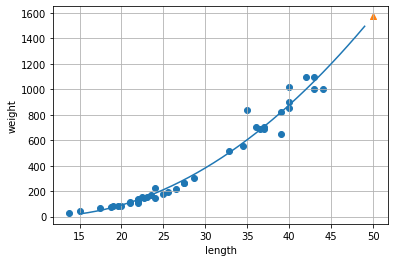

In [26]:
point = np.arange(15, 50)
plt.scatter(train_input, train_target)
plt.plot(point, lr.coef_[0] * (point ** 2) + lr.coef_[1] * point + lr.intercept_)

plt.scatter(50, lr.predict([[50 ** 2, 50]]), marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.grid()
plt.show()

In [27]:
lr.score(train_poly, train_target)

0.9706807451768623

In [28]:
lr.score(test_poly, test_target)

0.9775935108325122